# Artificial Neural Network model for car price prediction

(a regression problem)

The task is to predict the price of second hand cars using a ML model, namely ANNs (artificial neural networks). 

Also check sources: https://thinkingneuron.com/car-price-prediction-case-study-in-python/

https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/

In [2]:
# Import libraries

# Essential stuff

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

# You can do without them if you really want to code everything from scratch

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Just because I don't want to type tf.keras.layers every time

tfk = tf.keras              
tfkl = tf.keras.layers

2025-07-16 11:20:45.671936: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-16 11:20:45.672662: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-16 11:20:45.675085: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-16 11:20:45.681592: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752654045.692710   19773 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752654045.69

The meaning of each column:

Price: The Price of the car in dollars

Age: The age of the car in months

KM: How many KMS did the car was used

HP: Horsepower of the car

MetColor: Whether the car has a metallic color or not

CC: The engine size of the car

Doors: The number of doors in the car

Weight: The weight of the car

In [3]:
# Load data using pandas

data = pd.read_csv("Car_prices_2.csv", delimiter=';')
data.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


In [4]:
data_normed = data.copy()
data_normed.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


### Data preprocessing:

Identify the features and the target variable (what you want to predict)

Check the distribution of the target variable

Data exploration

Reject useless columns

Data distribution (e.g. Histograms)

Feature Selection based on data distribution

Identify outliers

Check for missing data 

Check for correlations (+ feature selection)

Converting data to numerical formar for ML model

In [5]:
# # Data preprocessing: normalizing the data

# data_normed["Price"] = (data_normed["Price"]-data_normed["Price"].min() )/ data_normed["Price"].max()
# data_normed["Age"] =( data_normed["Age"] - data_normed["Age"].min()) / data_normed["Age"].max()
# data_normed["KM"] = (data_normed["KM"] -  data_normed["KM"].min())/ data_normed["KM"].max()
# data_normed["Weight"] = (data_normed["Weight"] - data_normed["Weight"].min()) / data_normed["Weight"].max()
# data_normed["HP"] = (data_normed["HP"] - data_normed["HP"].min() )/ data_normed["HP"].max()
# # data_normed["MetColor"] = data["MetColor"] / data["MetColor"].max()
# data_normed["CC"] = (data_normed["CC"] - data_normed["CC"].min())/ data_normed["CC"].max()
# data_normed["Doors"] = (data_normed["Doors"] -  data_normed["Doors"].min()) / data_normed["Doors"].max()


# Data preprocessing: normalizing the data (CORRECTED)
data_normed["Price"] = (data_normed["Price"] - data_normed["Price"].min()) / (data_normed["Price"].max() - data_normed["Price"].min())
data_normed["Age"] = (data_normed["Age"] - data_normed["Age"].min()) / (data_normed["Age"].max() - data_normed["Age"].min())
data_normed["KM"] = (data_normed["KM"] - data_normed["KM"].min()) / (data_normed["KM"].max() - data_normed["KM"].min())
data_normed["Weight"] = (data_normed["Weight"] - data_normed["Weight"].min()) / (data_normed["Weight"].max() - data_normed["Weight"].min())
data_normed["HP"] = (data_normed["HP"] - data_normed["HP"].min()) / (data_normed["HP"].max() - data_normed["HP"].min())
data_normed["CC"] = (data_normed["CC"] - data_normed["CC"].min()) / (data_normed["CC"].max() - data_normed["CC"].min())
data_normed["Doors"] = (data_normed["Doors"] - data_normed["Doors"].min()) / (data_normed["Doors"].max() - data_normed["Doors"].min())


In [6]:
# Separate Target Variable and Feature Variables

Target=['Price']                                                            # what we want to predict
Features =['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']          # features that determine de price (hopefully)

x_features =data_normed[Features].values            # returns a Numpy representation of the DataFrame
y_target =data_normed[Target].values

In [31]:
print(x_features.shape)
print(y_target.shape)

(1435, 7)
(1435, 1)


### Split the data into test, train and validation

In [7]:
# Prepare test, train and validation data for the model

x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.3, random_state=45)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=45)

In [33]:
# Sanity check with the shapes of Training,testing and validation datasets

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(918, 7)
(918, 1)
(287, 7)
(287, 1)
(230, 7)
(230, 1)


In [8]:
# calculate r2 coefficient

def r2_coef(y_true, y_pred):
    y_pred = tf.convert_to_tensor(y_pred, np.float32)
    y_true = tf.convert_to_tensor(y_true, np.float32)
    SS_res = tfk.backend.sum(tfk.backend.square(y_true - y_pred)) 
    SS_tot = tfk.backend.sum(tfk.backend.square(y_true - tfk.backend.mean(y_true))) 
    return (1 -  SS_res/(SS_tot + tfk.backend.epsilon()) )
    # stabilize the division with a small epsilon

In [9]:
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

model_name = 'car_prices_trained_model.h5'

N_train = x_train.shape[0]
N_val = x_val.shape[0]
N_test = x_test.shape[0]

# define History Data callback

class HistoryData(tfk.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.histdata = []
    def on_epoch_end(self, epoch, logs={}):
        # get loss, accuracy, val_loss, val_accuracy
        self.histdata.append(logs.get('loss')) 
#       self.histdata.append(logs.get('accuracy')) 
        self.histdata.append(logs.get('r2_coef')) 
        self.histdata.append(logs.get('val_loss')) 
#        self.histdata.append(logs.get('val_accuracy'))
        self.histdata.append(logs.get('val_r2_coef')) 
        # get r2 -- training
        y_predicted=model.predict(x_train) 
        r2_train=r2_coef( y_train, y_predicted)
        # get r2 -- validation
        y_predicted=model.predict(x_val) 
        r2_val=r2_coef( y_val, y_predicted)        
        # get r2 -- test
        y_predicted=model.predict(x_test) 
        r2_test=r2_coef( y_test, y_predicted)
        # evaluate model -- train set -- evaluated on N_train
        scores = model.evaluate(x_train, y_train, batch_size=N_train, verbose=1)   
        datafile=open('saved_models/train_scores.dat','a')
        datafile.write('%i %.6e %.6e %.6e\n'%(epoch, scores[0], scores[1], r2_train))
        datafile.close()        
        # evaluate model -- validation set -- evaluated on N_val
        scores = model.evaluate(x_val, y_val, batch_size=N_val, verbose=1)   
        datafile=open('saved_models/val_scores.dat','a')
        datafile.write('%i %.6e %.6e %.6e\n'%(epoch, scores[0], scores[1], r2_val))
        datafile.close()                
        # evaluate model -- test set -- evaluated on N_test
        scores = model.evaluate(x_test, y_test, batch_size=N_test, verbose=1)   
        datafile=open('saved_models/test_scores.dat','a')
        datafile.write('%i %.6e %.6e %.6e\n'%(epoch, scores[0], scores[1], r2_test))
        datafile.close()
        # write History Data to file -- average values calculated on groups of batch_size
        datafile=open('saved_models/history_data.dat','a')
#        datafile.write('%i %.6e %.6e %.6e %.6e\n'%(epoch, \
#                logs.get('loss'), logs.get('accuracy'), logs.get('val_loss'), logs.get('val_accuracy')))
        datafile.write('%i %.6e %.6e %.6e %.6e\n'%(epoch, logs.get( 'loss'), logs.get('r2_coef'), logs.get( 'val_loss'), logs.get('val_r2_coef') ))        
        datafile.close()
        if epoch==(epochs-1):
            model.save('saved_models/model_epoch_'+str(epoch)+'.h5')

### ANN parameters:


input_dim=7: There are seven features in the input data which is expected by the first layer. 

units = number of neurons in layer: We are creating a layer with five neurons in it. Each of these five neurons will be receiving the values of inputs, for example, the values of ‘Age’ will be passed to all five neurons, similarly all other columns.


kernel_initializer=’normal’: When the Neurons start their computation, some algorithm has to decide the value for each weight. This parameter specifies that. You can choose different values for it.

activation=’relu’: This specifies the activation function for the calculations inside each neuron. You can try other activation functions, like ‘tanh’, ‘sigmoid’, etc.

batch_size=20: This specifies how many rows will be passed to the ANN in one go after which the calculation will begin and the neural network will start adjusting its weights based on the errors. When all the rows are passed in the batches of 20 rows each as specified in this parameter, then we call that 1-epoch (one full data cycle). A small value of batch_size will make the ANN look at the data slowly, like 2 rows at a time or 4 rows at a time which could lead to overfitting, as compared to a large value like 20 or 50 rows at a time, which will make the ANN look at the data fast which could lead to underfitting. Hence a proper value must be chosen using hyperparameter tuning.

Epochs=50: The same activity of adjusting weights continues for 50 times, as specified by this parameter. In simple terms, the ANN looks at the full training data 50 times and adjusts its weights.

In [ ]:
# Create the ANN architecture

model = tfk.Sequential(
    [
    tfkl.InputLayer(input_shape=(7,)),
    tfkl.Dense(64, activation='leaky_relu', name="Hidden_Layer_1", kernel_initializer='he_normal', bias_initializer='random_uniform'),
    tfkl.Dense(32, activation='leaky_relu', name="Hidden_Layer_2", kernel_initializer='he_normal', bias_initializer='random_uniform'),
    tfkl.Dense(16, activation="leaky_relu", name="Hidden_Layer_3", kernel_initializer='he_normal', bias_initializer='random_uniform'),
    # tfkl.Dense(32, activation='leaky_relu', name="Hidden_Layer_3", kernel_initializer='random_uniform', bias_initializer='random_uniform'),
    # tfkl.Dense(300, activation="leaky_relu", name="Hidden_Layer_3", kernel_initializer='random_uniform', bias_initializer='random_uniform'),
    # tfkl.Dense(500, activation="leaky_relu", name="Hidden_Layer_4", kernel_initializer='he_normal', bias_initializer='random_uniform'),
    # tfkl.Dense(600, activation="leaky_relu", name="Hidden_Layer_5", kernel_initializer='he_normal', bias_initializer='random_uniform'),
    tfkl.Dense(1, name="Output_Layer"),
    ]
)

/home/glosper/anaconda3/envs/tf216/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
W0000 00:00:1752649696.359407   22545 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Optimizers:

The optimizers modify each epoch’s weights and minimize the loss function, improving the accuracy.

In [11]:
# Set number of epochs and batch size

epochs = 500
batch_size = 16

# Set the optimizer

# opt = tfk.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
# opt = tfk.optimizers.SGD(learning_rate=0.01)
opt = tfk.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, amsgrad=False)

#Compile the model

model.compile(optimizer= opt, loss="mean_squared_error", metrics = [r2_coef])
model.summary()


# Fit model to training data and compute loss + other metrics

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val,y_val),callbacks = [HistoryData()], shuffle=False) #train model


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 0.6072 - r2_coef: -28.6579
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2715 - r2_coef: -16.3021
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2813 - r2_coef: -17.1502
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3290 - r2_coef: -17.0771
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.5194 - r2_coef: -40.1809 - val_loss: 0.2813 - val_r2_coef: -22.1884
Epoch 2/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 0.2758 - r2_coef: -14.70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1376 - r2_coef: -7.7693
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1444 - r2_coef: -8.3136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1766 - r2_coef: -8.7043
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2378 - r2_coef: -17.2861 - val_loss: 0.1444 - val_r2_coef: -

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - r2_coef: 0.8890 - val_loss: 0.0018 - val_r2_coef: 0.8225


In [47]:
# Make a prediction for the test data

y_pred = model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step


## Training and validation loss

The training loss is a metric used to assess how a deep learning model fits the training data so it assesses the error of the model on the training set. The validation loss is a metric used to assess the performance of a deep learning model on the validation set. The validation set is a portion of the dataset set aside to validate the performance of the model. 

Underfitting:  The validation loss is greater than the training loss, which may indicate that the model is underfitting. Underfitting occurs when the model is unable to accurately model the training data, and hence generates large errors. Furthermore, the results indicate that further training is needed (ore we may need more data/data preprocessing)

Overfitting: The validation loss is greater than the training loss. This usually indicates that the model is overfitting, and cannot generalize on new data. In particular, the model performs well on training data but poorly on the new data in the validation set. At a point, the validation loss decreases but starts to increase again. The model may be too complex for the data or the model was trained for too long. In this case, training can be halted when the loss is low and stable (early stopping).

Good fit: The training loss and validation loss both decrease and stabilize at a specific point

In [48]:
print(history.history.keys())

dict_keys(['loss', 'r2_coef', 'val_loss', 'val_r2_coef'])


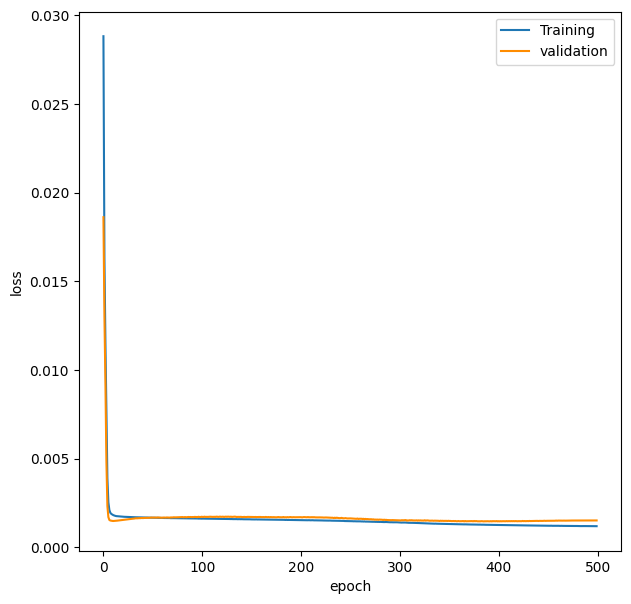

In [49]:
plt.figure(figsize=(7,7))
plt.plot(np.arange(epochs),history.history['loss'], label="Training")
plt.plot(np.arange(epochs), history.history['val_loss'], label="validation", c="darkorange")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

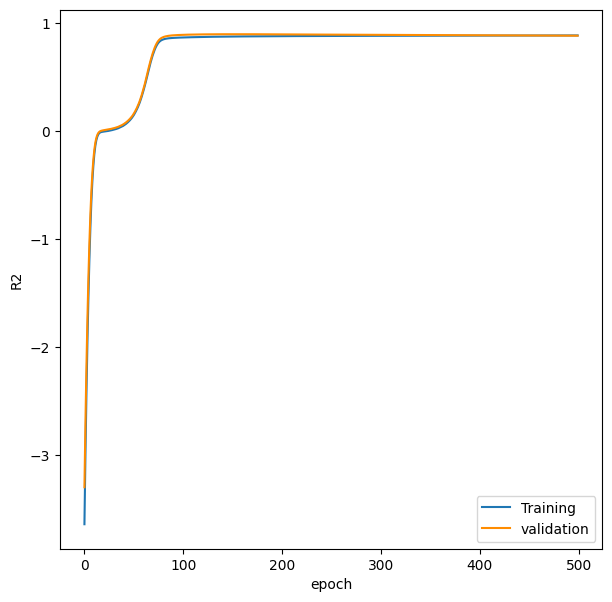

In [41]:
plt.figure(figsize=(7,7))
plt.plot(np.arange(epochs),history.history['r2_coef'], label="Training")
plt.plot(np.arange(epochs), history.history['val_r2_coef'], label="validation", c="darkorange")
plt.xlabel("epoch")
plt.ylabel("R2")
plt.legend()
plt.show()

R2 coeff:  0.899


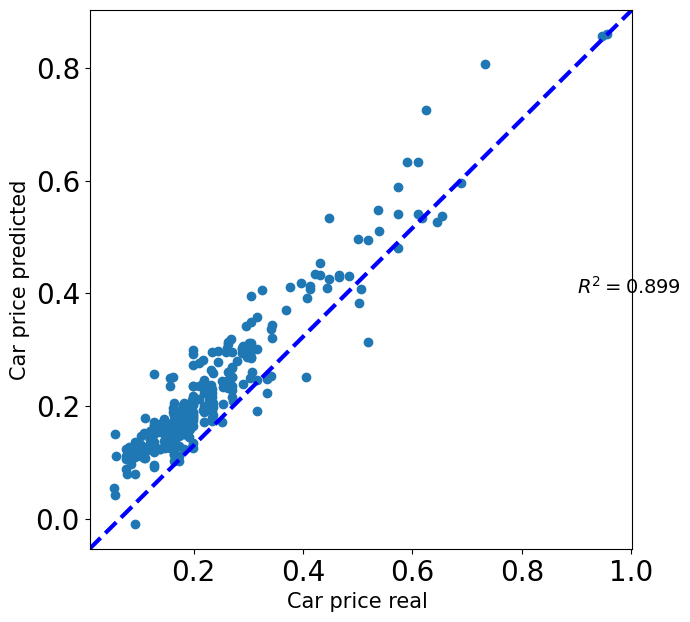

In [50]:
# Calculate and plot R2 score

r2 = r2_coef(y_test, y_pred)                   #you can also use r2_score from scikit learn, if y_test and y_pred are numpy arrays
r2_coeff = math.floor(r2*1000)/1000

print("R2 coeff: ", r2_coeff)

if (r2_coeff > 0):
    plt.rcParams["figure.figsize"] = (7,7)
    plt.scatter(y_test, y_pred)
    plt.text(0.9,0.4, r'$R^{2} = $' + str(r2_coeff), fontsize = 14)
    plt.ylabel(r"Car price predicted", fontsize = 15)
    plt.xlabel(r"Car price real ", fontsize = 15)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    lineStart = y_pred.min()
    lineEnd = y_test.max()
    y_lim = plt.ylim()
    x_lim = plt.xlim()
    plt.plot(x_lim, y_lim, '--', color = 'b', linewidth = 3)
    plt.ylim(y_lim)
    plt.xlim(x_lim)
    # plt.savefig("Energy_gap_prediction.png")
    plt.show()

The coefficient of determination:


$$
R^2=1-\frac{S S_{\mathrm{res}}}{S S_{\mathrm{tot}}}
$$

where

$$
S S_{\mathrm{res}}=\sum_i\left(y_i-f_i\right)^2
$$

is the residual sum of squares and

$$
S S_{\text {tot }}=\sum_i\left(y_i-\bar{y}\right)^2
$$

is the total sum of squares

The mean of the observed data is:

$$
\bar{y}=\frac{1}{n} \sum_{i=1}^n y_i
$$

and the residuals are defined as:

$$
e_i=y_i-f_i
$$